# **Classificação: Grau de Risco de Doença Cardíaca**


## Sobre o Conjunto de Dados
O Heart Disease Dataset do UCI Machine Learning Repository contém dados clínicos utilizados para a predição da presença de doença cardíaca em pacientes. O conjunto inclui variáveis demográficas, históricos médicos e resultados de exames físicos e laboratoriais. O conjunto completo tem 76 atributos, mas todos os experimentos publicados citam ter utilizado um subconjunto com apenas 14 deles. O presente projeto também usa somente esses 14 atributos.

Autores do Dataset:

* Andras Janosi;
* Wolfgang Steinbrunn;
* Martin Pfisterer; e
* Robert Detrano.

**Referência do Dataset:**
Janosi, A., Steinbrunn, W., Pfisterer, M., & Detrano, R. (1989). Heart Disease Dataset. UCI Machine Learning Repository.
https://doi.org/10.24432/C52P4X

## Sobre esse Notebook

Em 2024, utilizei o Heart Disease Dataset da UCI para desenvolver uma rede neural capaz de prever o risco de doenças cardíacas. Esse modelo foi desenvolvido como parte do Projeto Integrador IV da Universidade Virtual do Estado de São Paulo (UNIVESP). Durante o processo, retornei a um posto de saúde da minha cidade — onde já havia trabalhado anteriormente — para dialogar com os profissionais da área sobre o uso de aprendizado de máquina na saúde. As conversas com a equipe local foram fundamentais: além de fornecerem insights práticos e inspiração, também contribuíram para ancorar o projeto em um contexto realista e relevante.

Além do modelo, desenvolvi um painel interativo em Plotly para explorar as variáveis do conjunto de dados e comunicar os principais insights à comunidade envolvida. Realizei todo o desenvolvimento do projeto individualmente. Embora o relatório final inclua o nome de outro integrante, este se desvinculou do trabalho ainda na metade do percurso.

Algum tempo depois, retomei o projeto com o objetivo de refatorar o código, melhorar a explicação dos métodos utilizados e aplicar abordagens mais apropriadas ao problema. Uma das principais mudanças foi a implementação de um modelo de regressão logística, mais adequado ao cenário de classificação multiclasse presente no conjunto de dados.

Na versão inicial, forcei a aplicação de uma rede neural, mesmo com limitações que comprometiam sua performance. Entre os principais problemas encontrados, destaco:

* Tamanho reduzido do dataset: com cerca de 300 amostras, o volume de dados era insuficiente para treinar uma rede neural com bom desempenho, resultando em acurácias entre 60% e 70%. Além disso, modelos mais complexos sofriam rapidamente com overfitting.

* Separabilidade linear das variáveis: a análise exploratória de dados (EDA) indicava que muitas das variáveis quantitativas apresentavam separação razoavelmente linear entre as classes, o que favorece modelos como a regressão logística. Isso também foi confirmado empiricamente pelos resultados obtidos com classificadores lineares.

Com a retomada do projeto, pude revisar o pipeline de pré-processamento, aplicar validações mais robustas e, para o caso da rede neural, reformular o problema como uma tarefa de classificação binária. Essa mudança resultou em um modelo mais estável e com desempenho significativamente superior ao original.

## Atributos do Dataset Utilizados:

1. **`age` (atributo #3)**
   Idade do paciente, em anos.

2. **`sex` (atributo #4)**
   Sexo biológico:

   * `1` = Masculino
   * `0` = Feminino

3. **`cp` (atributo #9)**
   Tipo de dor no peito:

   * `1` = Angina típica
   * `2` = Angina atípica
   * `3` = Dor não anginosa
   * `4` = Assintomático

4. **`trestbps` (atributo #10)**
   Pressão arterial em repouso (mm Hg), medida na admissão hospitalar.

5. **`chol` (atributo #12)**
   Nível de colesterol sérico em mg/dL.

6. **`fbs` (atributo #16)**
   Glicemia de jejum > 120 mg/dL:

   * `1` = Verdadeiro
   * `0` = Falso

7. **`restecg` (atributo #19)**
   Resultado do eletrocardiograma em repouso:

   * `0` = Normal
   * `1` = Anormalidade na onda ST-T
   * `2` = Hipertrofia ventricular esquerda segundo critérios de Estes

8. **`thalach` (atributo #32)**
   Frequência cardíaca máxima atingida durante o teste de esforço.

9. **`exang` (atributo #38)**
   Angina induzida por exercício:

   * `1` = Sim
   * `0` = Não

10. **`oldpeak` (atributo #40)**
    Depressão do segmento ST induzida por exercício em relação ao repouso.

11. **`slope` (atributo #41)**
    Inclinação do segmento ST no pico do exercício:

* `1` = Ascendente
* `2` = Plano
* `3` = Descendente

12. **`ca` (atributo #44)**
    Número de vasos principais (0–3) com coloração visível por fluoroscopia.

13. **`thal` (atributo #51)**
    Resultado do exame de tálio:

* `3` = Normal
* `6` = Defeito fixo
* `7` = Defeito reversível

14. **`num` (atributo #58)** *(Target)*
    Diagnóstico de doença cardíaca (estado da doença com base em angiografia):

* `0` = Não há estreitamento significativo (< 50%)
* `1–4` = Grau de obstrução em ao menos uma artéria principal (> 50%)
  (em algumas versões do dataset, isso é binarizado como `0` = ausência de doença e `1` = presença)


## Dependências

In [ ]:
# dataset UCI

!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# tf, keras

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import Model
from keras.layers import Dense, Dropout, BatchNormalization
from keras.layers import LeakyReLU, ReLU
from keras import regularizers
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping


# np, Plt, seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay


print('\nTensorFlow: {}'.format(tf.__version__))
print('Numpy: {}'.format(np.__version__))


TensorFlow: 2.18.0
Numpy: 2.0.2


## Dataset

In [ ]:
# fetch dataset
dados = fetch_ucirepo(id=45)

features = dados.data.features
targets = dados.data.targets

df = features
df['target'] = targets

## Exploring

In [ ]:
print(f"Número de linhas: {df.shape[0]} \nNúmero de colunas: {df.shape[1]}")

Número de linhas: 303 
Número de colunas: 14


In [ ]:
# Int to Float

to_float = ["trestbps", "chol", "thalach"]

for col in to_float:
  df[col] = df[col].astype("float64")

df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,float64
chol,float64
fbs,int64
restecg,int64
thalach,float64
exang,int64
oldpeak,float64


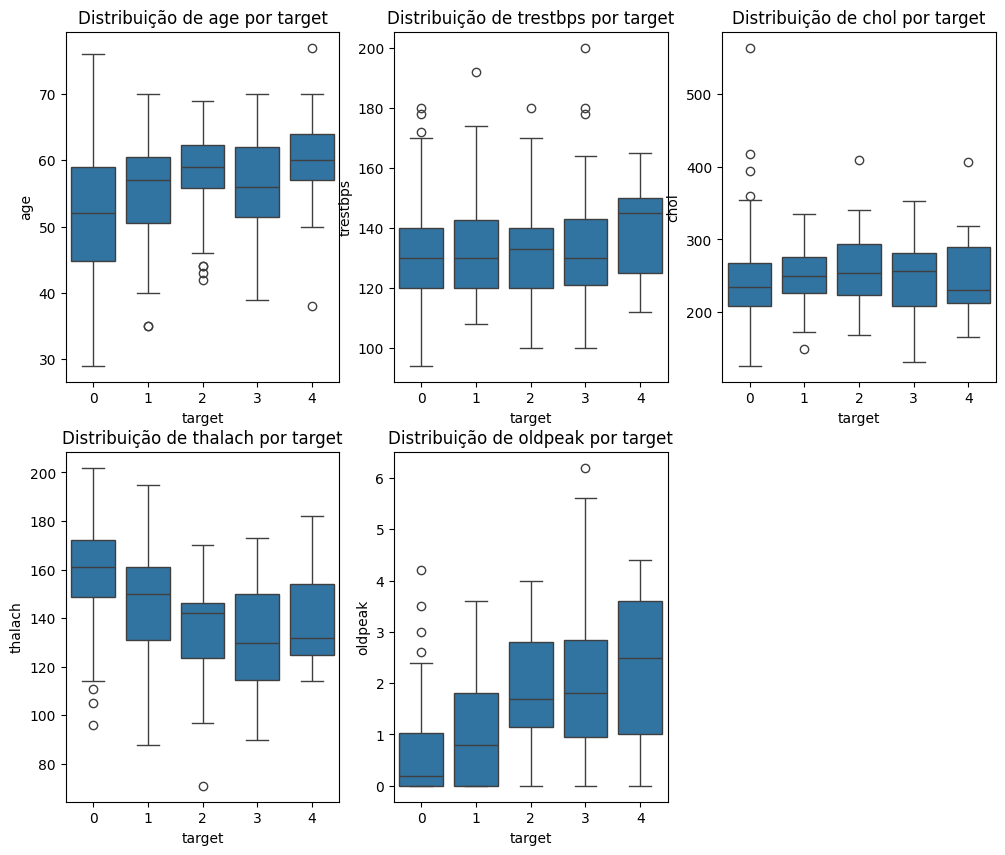

In [ ]:
numerical = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Boxplots

plt.figure(figsize = (12,10))
for i, item in enumerate(numerical):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df, x='target', y=item)
    plt.title(f'Distribuição de {item} por target')
plt.show()

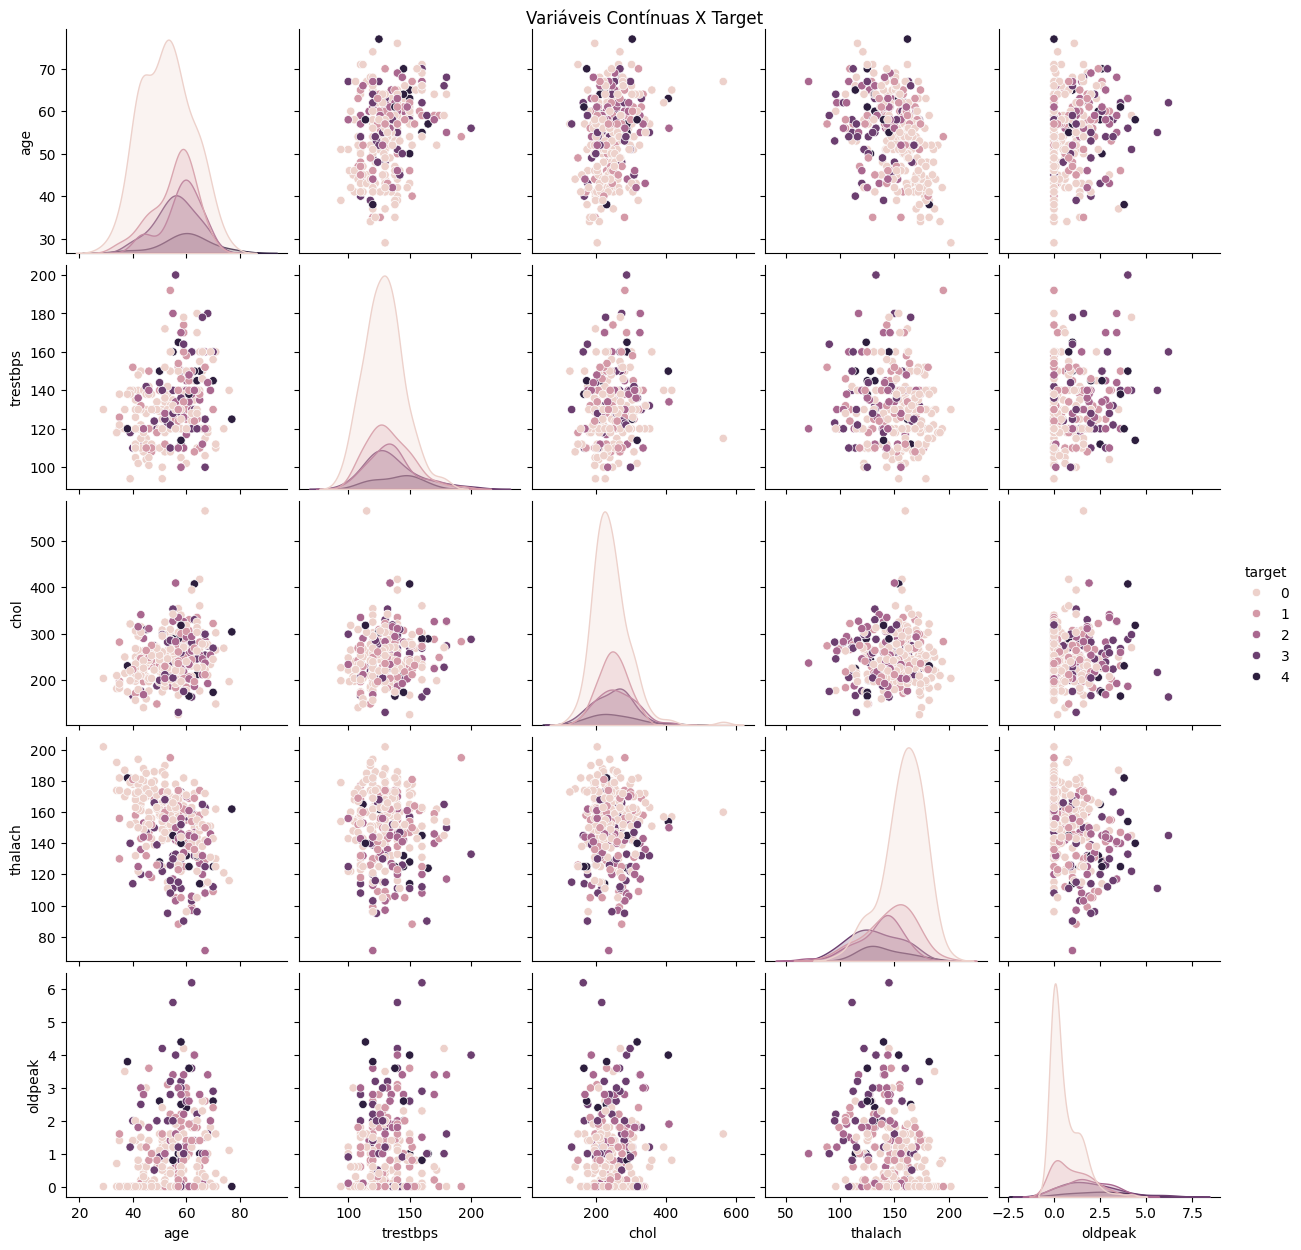

In [ ]:
# Pairplot (observe que existe alguma possível seperação linear)

sns.pairplot(df, vars= numerical, hue='target', diag_kind='kde')
plt.suptitle("Variáveis Contínuas X Target", y = 1.00)
plt.show()

## NAs, Split

In [ ]:
# Remove nulls

df = df[~df.isin(['?'])]
df = df.dropna(axis=0)

In [ ]:
# X, y split

X = df.drop(['target'], axis=1)

# Binary

df['bi'] = (df['target'] > 0).astype(int)

y = df['bi']

## Train_Test, Normalização, One Hot Encoding

In [ ]:
# Variaveis

input_shape = X.shape[1]
num_class = 1

print(input_shape)

13


In [ ]:
# OHE (not using anymore)
#y = keras.utils.to_categorical(y, num_class)

In [ ]:
scaler = StandardScaler()

In [ ]:
# Split

X_num = df[numerical]
X_cat = df[categorical]

In [ ]:
# Normalização

X_num_scaled = scaler.fit_transform(X_num)

In [ ]:
X_scaled = pd.DataFrame(X_num_scaled, columns=numerical, index=X_num.index)
X_scaled = pd.concat([X_scaled, X_cat], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

## **Modelo Classificação Multiclass**

In [ ]:
model = keras.Sequential()

model.add(Dense(16, input_shape= (input_shape,), activation='relu', kernel_regularizer=regularizers.l2(0.001)))

model.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.2))

model.add(Dense(num_class, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    loss="binary_crossentropy",
    optimizer= Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
# Treinando o Modelo

history = model.fit(
    X_train, y_train,
    epochs=30,
    validation_split=0.2,
    verbose=1,
    batch_size=12,
    callbacks=[early_stopping]
)

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.4904 - loss: 0.7152 - val_accuracy: 0.6250 - val_loss: 0.6765
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6380 - loss: 0.6676 - val_accuracy: 0.6250 - val_loss: 0.6580
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6679 - loss: 0.6527 - val_accuracy: 0.6250 - val_loss: 0.6424
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6476 - loss: 0.6411 - val_accuracy: 0.6875 - val_loss: 0.6266
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5729 - loss: 0.6417 - val_accuracy: 0.7292 - val_loss: 0.6116
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7185 - loss: 0.6015 - val_accuracy: 0.7292 - val_loss: 0.5973
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6983 - loss: 0.6002 - val_accuracy: 0.7500 - val_loss: 0.5825
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7413 - loss: 0.5805 - val_accuracy: 0.7708 - val_loss

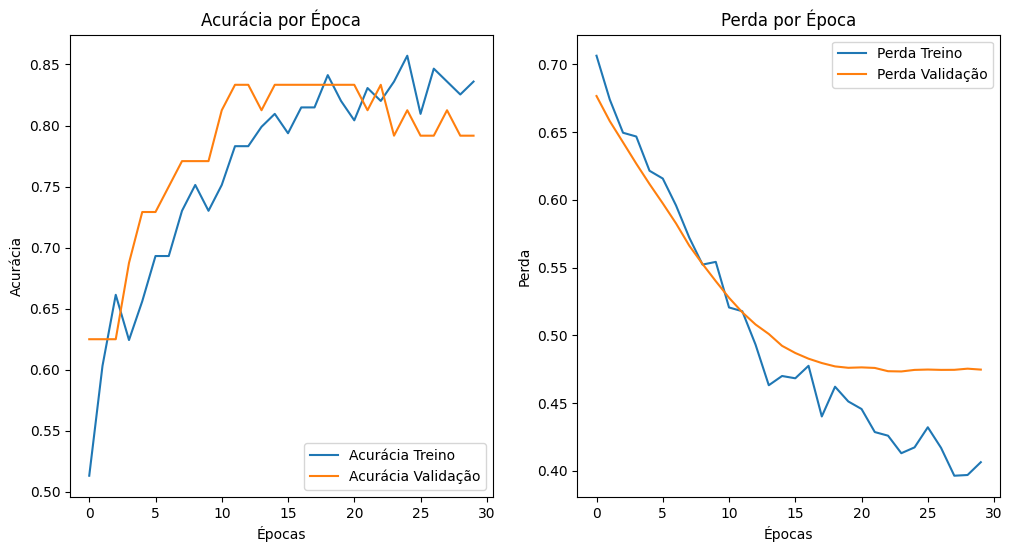

In [ ]:
# Acurácia

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.title('Acurácia por Época')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

# Perda

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda Treino')
plt.plot(history.history['val_loss'], label='Perda Validação')
plt.title('Perda por Época')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

In [ ]:
# Avaliando com conjunto de testes

print('\n=== Avaliação do modelo (Teste) ===\n')
results = model.evaluate(X_test, y_test, batch_size=32)

print('\nPerda (teste): {}\nAcurácia (Teste): {}'.format(round(results[0],3), round(results[1],3)))



=== Avaliação do modelo (Teste) ===

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 427ms/step - accuracy: 0.8361 - loss: 0.4868

Perda (teste): 0.52
Acurácia (Teste): 0.817


## Regressão Logística

In [ ]:
model_lr = LogisticRegression(class_weight='balanced', random_state=12, max_iter=1000)
model_lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=12)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.82        36
           1       0.71      0.83      0.77        24

    accuracy                           0.80        60
   macro avg       0.79      0.81      0.80        60
weighted avg       0.81      0.80      0.80        60

ROC AUC: 0.8055555555555556




<Figure size 800x600 with 0 Axes>

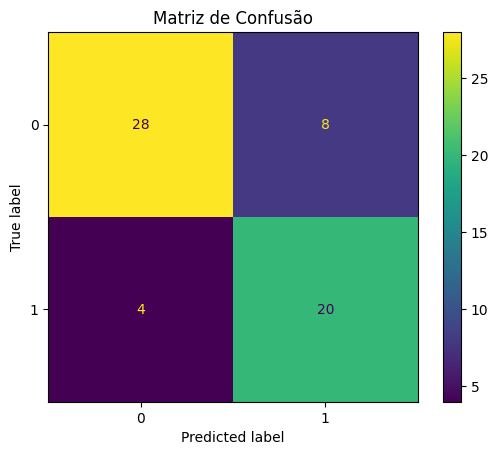

In [ ]:
# Para classificação binária com sigmoid
y_prob = model_lr.predict(X_test).ravel()  # garante vetor 1D
y_pred = (y_prob >= 0.5).astype(int)    # aplica limiar

# Relatório de Classificação

print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("\n")

# Matriz de Confusão

plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Matriz de Confusão")
plt.grid(False)
plt.show()